In [23]:
import pandas
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [24]:
# Reads .csv file as Numpy Ndarray
dataset = pd.read_csv("/content/diabetes.csv", header=None).values

In [25]:
#print Datatype and the sape of the data
print(type(dataset))
print(dataset.shape)

<class 'numpy.ndarray'>
(768, 9)


In [26]:
#Normalizing the data
#from sklearn.preprocessing import StandardScaler 
#sc = StandardScaler()
#scdataset= sc.fit_transform(dataset)

In [27]:
 #splitting the data after using StandardScaler
#X_train, X_test, Y_train, Y_test = train_test_split(scdataset[:,0:8], scdataset[:,8], test_size=0.25, random_state=22)


# Last column is our target [0, 1]
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.25, random_state=22)

print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (576, 8)
Y_train.shape:  (576,)
X_test.shape:  (192, 8)
Y_test.shape:  (192,)


In [28]:
my_first_nn = Sequential() # create a Sequential model

my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(40, input_dim=8, activation='relu')) # more Dense layer
my_first_nn.add(Dense(60, input_dim=8, activation='relu')) # more Dense layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer (WHY 'sigmoid function!!!')

my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(my_first_nn.summary())

# The returned history object holds a record of the loss values and metric values during training
history =  my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=150, verbose=1, shuffle=True, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 20)                180       
_________________________________________________________________
dense_13 (Dense)             (None, 40)                840       
_________________________________________________________________
dense_14 (Dense)             (None, 60)                2460      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 61        
Total params: 3,541
Trainable params: 3,541
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/150
18/18 [==============================] - 1s 22ms/step - loss: 4.1283 - acc: 0.4592 - val_loss: 1.5134 - val_acc: 0.3854
Epoch 2/150
18/18 [==============================] - 0s 3ms/step - loss: 1.2905 - acc: 0.4776 - val_loss: 0.8968 

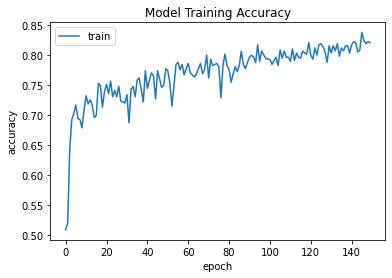

In [29]:
plt.plot(history.history['acc'])
plt.title('Model Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [30]:
#Evaluate the model
print(my_first_nn.evaluate(X_test, Y_test))

6/6 [==============================] - 0s 2ms/step - loss: 0.6482 - acc: 0.6615
[0.6482424139976501, 0.6614583134651184]
